# Exploratory Data Analysis (EDA) of Zillow Data
In this notebook initial EDA is conducted on the Zillow data set.

## Import required packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Import processed data
- Columns are in lower case
- Zip code column renamed to zip
- Index set to date column in datetime format

In [2]:
zill = pd.read_csv('../data/processed/zillow_cleaned_no_nulls.csv', index_col=0)

In [7]:
zill.dtypes

regionid        int64
zip            object
city           object
state          object
metro          object
countyname     object
sizerank        int64
value         float64
dtype: object

In [8]:
zill.index = pd.to_datetime(zill.index)

In [9]:
zill.zip = zill.zip.apply(lambda z: str(z))

In [10]:
zill.columns

Index(['regionid', 'zip', 'city', 'state', 'metro', 'countyname', 'sizerank',
       'value'],
      dtype='object')

In [11]:
zill.head()

,regionid,zip,city,state,metro,countyname,sizerank,value
date,,,,,,,,
1996-04-01,58196,1001,Agawam,MA,Springfield,Hampden,5851,113100.0
1996-05-01,58196,1001,Agawam,MA,Springfield,Hampden,5851,112800.0
1996-06-01,58196,1001,Agawam,MA,Springfield,Hampden,5851,112600.0
1996-07-01,58196,1001,Agawam,MA,Springfield,Hampden,5851,112300.0
1996-08-01,58196,1001,Agawam,MA,Springfield,Hampden,5851,112100.0


## Below, each feature is analyzed for the data set in turn
Prior to creating any models, each feature is assessed to discover if there are any underlying issues affecting feature selection in this data set.

In [12]:
zill.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3901595 entries, 1996-04-01 to 2018-04-01
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   regionid    int64  
 1   zip         object 
 2   city        object 
 3   state       object 
 4   metro       object 
 5   countyname  object 
 6   sizerank    int64  
 7   value       float64
dtypes: float64(1), int64(2), object(5)
memory usage: 267.9+ MB


After initial research, Zillow defines 'sizerank' as the average house price per state divided by the population of that state.

## Datetime Index

In [13]:
len(zill.index.value_counts())

265

__Key Takeaway__ The original data set included 265 columns for months and years with the associated price of a house.  As such, the value counts for features in the EDA for this data set must be divided by 265 to assure accurate actual counts.

### RegionID

In [14]:
zill.regionid.value_counts()/265

63457    1.0
92897    1.0
60113    1.0
99067    1.0
74479    1.0
        ... 
89457    1.0
99690    1.0
77180    1.0
60740    1.0
69666    1.0
Name: regionid, Length: 14723, dtype: float64

In [15]:
(zill.regionid.value_counts().min()/265), (zill.regionid.value_counts().max()/265)

(1.0, 1.0)

__Key Takeaway__ This value is unique to all values and therefore adds no value.  It will be removed after the comparison of regions against one another.  As such, this column is added the the 'kill_cols' list for ulitmate deletion.

In [16]:
zill.metro.value_counts()

New York                          206435
Los Angeles-Long Beach-Anaheim     91955
Chicago                            86125
Philadelphia                       74465
Washington                         65985
                                   ...  
Alice                                265
Lamesa                               265
Sweetwater                           265
Silver City                          265
Mount Pleasant                       265
Name: metro, Length: 701, dtype: int64

In [17]:
kill_cols = ['regionid']

## Zip

In [18]:
(zill.zip.value_counts().min()/265), (zill.zip.value_counts().max()/265)

(1.0, 1.0)

In [19]:
zill.zip.value_counts()

66618    265
23692    265
76119    265
45669    265
42701    265
        ... 
90744    265
66901    265
14568    265
67002    265
12206    265
Name: zip, Length: 14723, dtype: int64

__Key Takeaway__  This is the value for which we are picking the "best" performers.  As such it will be kept for EDA purposes.

## City

In [20]:
(zill.city.value_counts().min()/265), (zill.city.value_counts().max()/265)

(1.0, 114.0)

In [21]:
zill.city.value_counts()

New York         30210
Los Angeles      25175
Houston          23320
San Antonio      12720
Washington       11925
                 ...  
Apalachicola       265
Longville          265
Readyville         265
Mineral Bluff      265
San Miguel         265
Name: city, Length: 7554, dtype: int64

## State

In [22]:
(zill.state.value_counts().min()/265), (zill.state.value_counts().max()/265)

(16.0, 1224.0)

In [23]:
zill.state.value_counts()/265

CA    1224.0
NY    1015.0
TX     989.0
PA     831.0
FL     785.0
OH     588.0
IL     547.0
NJ     502.0
MI     499.0
NC     428.0
IN     428.0
MA     417.0
TN     404.0
VA     401.0
MN     375.0
GA     345.0
WA     341.0
WI     332.0
MO     319.0
MD     317.0
CO     249.0
KS     241.0
AZ     230.0
OR     224.0
OK     221.0
SC     206.0
NH     199.0
LA     193.0
AL     183.0
IA     158.0
MS     153.0
KY     139.0
CT     124.0
UT     121.0
ID     110.0
AR     105.0
NV     103.0
ME      86.0
NE      83.0
WV      72.0
MT      71.0
HI      62.0
NM      60.0
RI      59.0
DE      41.0
ND      31.0
WY      31.0
AK      28.0
SD      19.0
DC      18.0
VT      16.0
Name: state, dtype: float64

## Metro

In [24]:
(zill.metro.value_counts().min()/265), (zill.metro.value_counts().max()/265)

(1.0, 779.0)

In [25]:
zill.metro.value_counts()/265

New York                          779.0
Los Angeles-Long Beach-Anaheim    347.0
Chicago                           325.0
Philadelphia                      281.0
Washington                        249.0
                                  ...  
Alice                               1.0
Lamesa                              1.0
Sweetwater                          1.0
Silver City                         1.0
Mount Pleasant                      1.0
Name: metro, Length: 701, dtype: float64

## CountyName

In [26]:
(zill.countyname.value_counts().min()/265), (zill.countyname.value_counts().max()/265)

(1.0, 264.0)

In [27]:
zill.countyname.value_counts()/265

Los Angeles      264.0
Jefferson        175.0
Orange           166.0
Washington       164.0
Montgomery       159.0
                 ...  
Hopewell City      1.0
Ralls              1.0
Cannon             1.0
Catahoula          1.0
Owyhee             1.0
Name: countyname, Length: 1212, dtype: float64

## SizeRank

In [28]:
zill.sizerank.min(), zill.sizerank.max()

(1, 14723)

In [29]:
zill.sizerank

date
1996-04-01    5851
1996-05-01    5851
1996-06-01    5851
1996-07-01    5851
1996-08-01    5851
              ... 
2017-12-01    7294
2018-01-01    7294
2018-02-01    7294
2018-03-01    7294
2018-04-01    7294
Name: sizerank, Length: 3901595, dtype: int64

## Value

In [30]:
zill.value.min(), zill.value.max()

(11300.0, 19314900.0)

In [31]:
type(zill.index)

pandas.core.indexes.datetimes.DatetimeIndex

### Let's first explore all house values by year in the data set

In [32]:
zill.columns

Index(['regionid', 'zip', 'city', 'state', 'metro', 'countyname', 'sizerank',
       'value'],
      dtype='object')

In [33]:
yearly = zill.groupby([zill.index.year, zill.zip]).agg({'regionid': 'min', 'sizerank': 'min', 'value': 'mean'})

In [34]:
yearly.index.get_level_values(0)

Int64Index([1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            ...
            2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
           dtype='int64', name='date', length=338629)

In [35]:
sns.set()

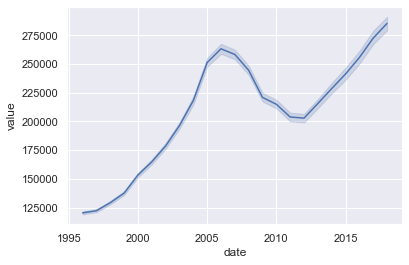

In [36]:
yearly_lineplot = sns.lineplot(x = yearly.index.get_level_values(0), 
                               y = 'value', 
                               data = yearly);

In [37]:
fig = yearly_lineplot.get_figure()    
fig.savefig('../viz/all_values_annual.png')

__Key takeaway__: It appears that there was a dip in the mean of all housing prices starting in 2006 hitting the bottom in 2011 and rebounding through 2018.  Perhaps it's best to investigate housing value from 2011 through 2018.  With that said, it would be interesting to see which zip codes exhibited resilience to the housing crisis from 2006 to 2011 as a potential future indicator of retained value through a national crisis.

### What zip codes inceased in value the most from 2011 to 2018?
After housing prices rebounded from the 2006 dip, which 10 zip codes increase the most in value?

In [38]:
y2011_on = yearly.loc[(yearly.index.get_level_values(0) >= 2011)]

In [39]:
y2011_on.index.get_level_values(0)

Int64Index([2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
            ...
            2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
           dtype='int64', name='date', length=117784)

In [40]:
y2011_to_2018 = pd.DataFrame()
vals_2018 = y2011_on.loc[(y2011_on.index.get_level_values(0) == 2018)].value
vals_2011 = y2011_on.loc[(y2011_on.index.get_level_values(0) == 2011)].value

In [41]:
vals_2011;

In [42]:
z = y2011_on.loc[(y2011_on.index.get_level_values(0) == 2018)].index.get_level_values(1).to_list()
v_2011 = vals_2011.to_list()
v_2018 = vals_2018.to_list()

In [43]:
y2011_to_2018 = pd.DataFrame()
y2011_to_2018['zips'] = z
y2011_to_2018['v_2011'] = v_2011
y2011_to_2018['v_2018'] = v_2018
y2011_to_2018['18_less_11'] = y2011_to_2018.v_2018 - y2011_to_2018.v_2011

In [44]:
top10 = y2011_to_2018.sort_values(by = '18_less_11', ascending = False).head(10)

In [45]:
top10

,zips,v_2011,v_2018,18_less_11
4,10021,1.282832e+07,18282225.0,5.453900e+06
1,10011,6.639325e+06,11717175.0,5.077850e+06
13590,94027,3.018625e+06,6763625.0,3.745000e+06
12902,90210,2.536608e+06,5854700.0,3.318092e+06
13628,94301,1.792317e+06,4711200.0,2.918883e+06
13587,94022,1.739783e+06,4275175.0,2.535392e+06
2,10014,6.864725e+06,9244300.0,2.379575e+06
4691,33480,2.482375e+06,4666550.0,2.184175e+06
13621,94123,2.456875e+06,4625525.0,2.168650e+06
12940,90402,2.135925e+06,4156500.0,2.020575e+06


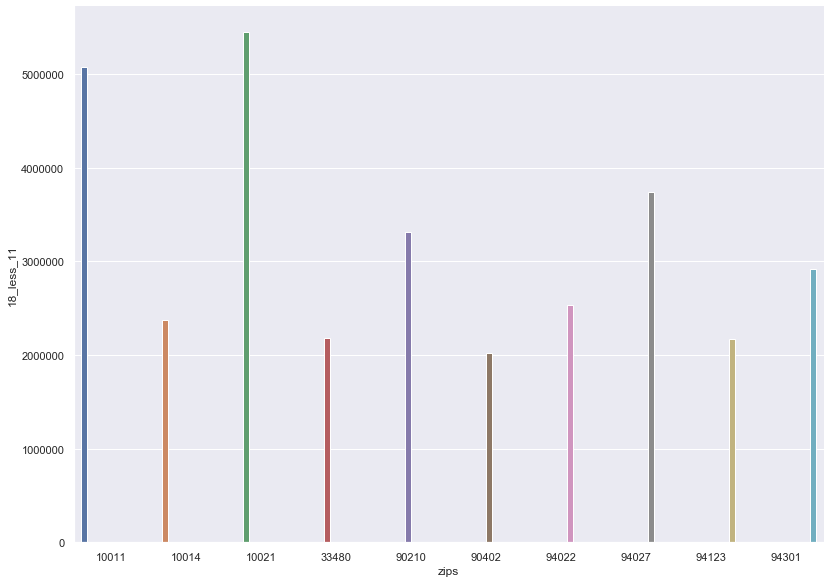

In [46]:
sns.catplot(x = 'zips', 
            y = '18_less_11', 
            data = top10, 
            hue = 'zips', 
            kind = 'bar', 
            height=8.27, 
            aspect=11.7/8.27);

### Top 10 most profitable zip codes from 2011 to 2018
- 10011: Chelsea, NYC
- 10014: Greenwich Village, NYC
- 10021: Upper East Side, NYC
- 33480: Palm Beach, FL
- 90210: Beverly Hills, CA
- 90402: Santa Monica, CA
- 94022: Los Altos, CA (outside San Jose)
- 94027: Atherton, CA
- 94123: San Francisco, CA
- 94301: Palo Alto, CA

In [47]:
# y2011_on_lineplot = sns.lineplot(x = y2011_on.index.get_level_values(0),
#                                  y = 'value',
#                                  data = y2011_on, 
#                                  hue = y2011_on.index.get_level_values(1));

In [48]:
# fig2011 = y2011_on_lineplot.get_figure()    
# fig2011.savefig('../viz/all_values_annual.png')

### Resiliant Zips
To assess resiliance to risk, which zip codes were the least affected by the housing crisis from 2006 to 2011?

In [49]:
y2006_to_2011 = yearly.loc[(yearly.index.get_level_values(0) >= 2006) & \
                           (yearly.index.get_level_values(0) <= 2011)]

In [50]:
vals_2011 = y2006_to_2011.loc[(y2006_to_2011.index.get_level_values(0) == 2011)].value
vals_2006 = y2006_to_2011.loc[(y2006_to_2011.index.get_level_values(0) == 2006)].value

In [51]:
z = y2006_to_2011.loc[(y2006_to_2011.index.get_level_values(0) == 2011)].index.get_level_values(1).to_list()
v_2006 = vals_2006.to_list()
v_2011 = vals_2011.to_list()

In [52]:
y2006_to_2011 = pd.DataFrame()
y2006_to_2011['zips'] = z
y2006_to_2011['v_2006'] = v_2006
y2006_to_2011['v_2011'] = v_2011
y2006_to_2011['11_less_06'] = y2006_to_2011.v_2011 - y2006_to_2011.v_2006

In [53]:
res10 = y2006_to_2011.sort_values(by = '11_less_06', ascending = False).head(10)

In [60]:
res10

,zips,v_2006,v_2011,11_less_06
4,10021,9.886783e+06,1.282832e+07,2.941542e+06
1,10011,4.456908e+06,6.639325e+06,2.182417e+06
2,10014,4.774942e+06,6.864725e+06,2.089783e+06
10,10128,4.979258e+06,6.083183e+06,1.103925e+06
4235,3215,2.170333e+05,6.564500e+05,4.394167e+05
212,11215,1.053833e+06,1.253717e+06,1.998833e+05
214,11217,1.431575e+06,1.619525e+06,1.879500e+05
226,11231,1.305492e+06,1.473533e+06,1.680417e+05
398,11932,1.419350e+06,1.533592e+06,1.142417e+05
13706,94608,2.170333e+05,3.206167e+05,1.035833e+05


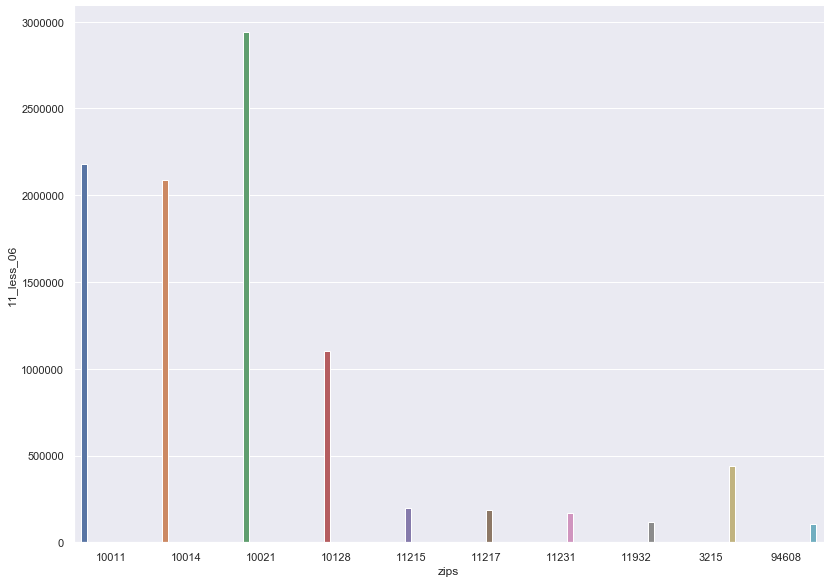

In [55]:
sns.catplot(x = 'zips', 
            y = '11_less_06', 
            data = res10, 
            hue = 'zips', 
            kind = 'bar', 
            height=8.27, 
            aspect=11.7/8.27);

### Most resiliant zips include:
- 10011: Chelsea, NY
- 10014: Greenwich Village, NY
- 10021: Upper East Side, NY
- 10128: North Upper East Side, NY
- 11215: Brooklyn, NY
- 11217: Boerum, Ny (North of Brooklyn)
- 11231: Carroll Gardens, NY
- 11932: Bridgehampton, NY
- (0)3215: Waterville Valley, NH
- 94608: Oakland, CA

In [64]:
# zill.loc[(zill.zip == '94608')]

## Maximum real estate value increase across the entire data set
What zip codes increased in value the most from 1996 to 2018?

In [65]:
vals_1996 = yearly.loc[(yearly.index.get_level_values(0) == 1996)].value
vals_2018 = yearly.loc[(yearly.index.get_level_values(0) == 2018)].value

In [66]:
z = yearly.loc[(yearly.index.get_level_values(0) == 2018)].index.get_level_values(1).to_list()
v_1996 = vals_1996.to_list()
v_2018 = vals_2018.to_list()

In [67]:
y1996_to_2018 = pd.DataFrame()
y1996_to_2018['zips'] = z
y1996_to_2018['v_1996'] = v_1996
y1996_to_2018['v_2018'] = v_2018
y1996_to_2018['18_less_96'] = y1996_to_2018.v_2018 - y1996_to_2018.v_1996

In [68]:
all_time10 = y1996_to_2018.sort_values(by = '18_less_96', ascending = False).head(10)

In [69]:
all_time10

,zips,v_1996,v_2018,18_less_96
4,10021,1.397667e+05,18282225.0,1.814246e+07
1,10011,1.397667e+05,11717175.0,1.157741e+07
2,10014,1.397667e+05,9244300.0,9.104533e+06
13590,94027,1.202589e+06,6763625.0,5.561036e+06
12902,90210,1.023000e+06,5854700.0,4.831700e+06
13628,94301,7.273667e+05,4711200.0,3.983833e+06
13621,94123,8.878111e+05,4625525.0,3.737714e+06
4691,33480,9.592667e+05,4666550.0,3.707283e+06
10,10128,3.791967e+06,7363300.0,3.571333e+06
13587,94022,8.119778e+05,4275175.0,3.463197e+06


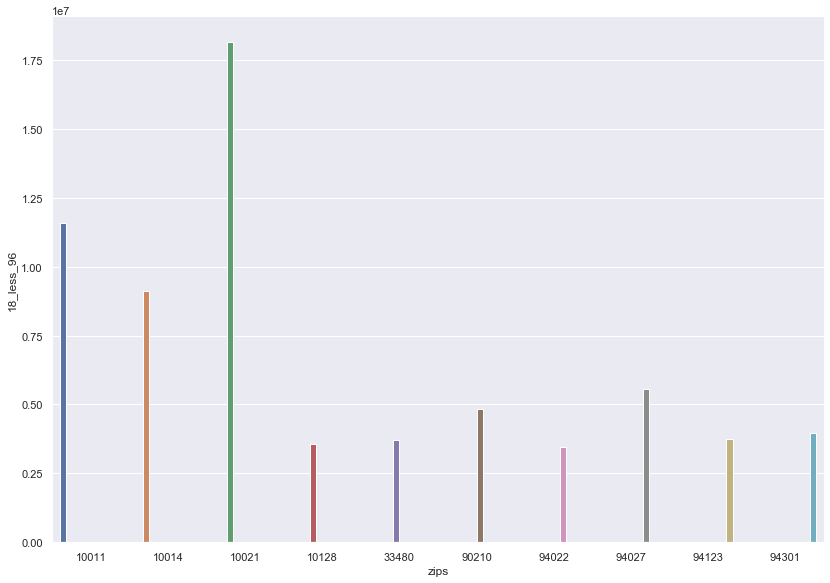

In [70]:
sns.catplot(x = 'zips', 
            y = '18_less_96', 
            data = all_time10, 
            hue = 'zips', 
            kind = 'bar', 
            height=8.27, 
            aspect=11.7/8.27);

### Most profitable zip codes from 1996 to 2018:
- 10011: Chelsea, NYC
- 10014: West Village, NYC
- 10021: Upper East Side, NYC
- 10128: North Uppder East Side, NYC
- 33480: Palm Beach, FL
- 90210: Beverly Hills, CA
- 94022: Los Altos, CA
- 94027: Atherton, CA
- 94123: San Francisco, CA
- 94301: Palo Alto, CA

In [79]:
# zill.loc[(zill.zip == '94301')]

## Seasonality in real estate prices
Are there any sesonality trend in the real estate prices?  Let's take a look.

In [80]:
monthly = zill.groupby([zill.index.month, zill.zip]).agg({'regionid': 'min', 'sizerank': 'min', 'value': 'mean'})

In [81]:
monthly

regionid  sizerank         value
date zip                                    
1    1001      58196      5851  1.757182e+05
     10011     61625        21  4.942405e+06
     10014     61628       509  4.741191e+06
     1002      58197      4200  2.754045e+05
     10021     61635       273  8.919568e+06
...              ...       ...           ...
12   99709    100384      4527  2.109364e+05
     99712    100387      8439  2.183636e+05
     99801    100459      4107  2.917636e+05
     99835    100473      8659  2.755409e+05
     99901    100478      7294  2.175682e+05

[176676 rows x 3 columns]

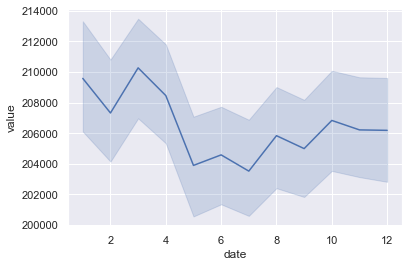

In [82]:
## Monthly sales prices for all housing prices
monthly_lineplot_all = sns.lineplot(x = monthly.index.get_level_values(0),
                                y = 'value',
                                data = monthly);

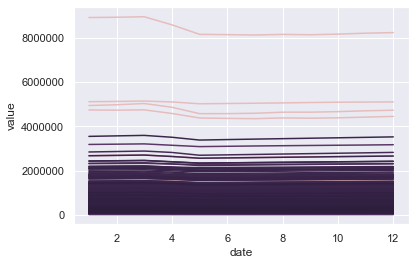

In [83]:
## Monthly sales prices by zip
monthly_lineplot = sns.lineplot(x = monthly.index.get_level_values(0),
                                y = 'value',
                                data = monthly,
                                hue = monthly.index.get_level_values(1), 
                                legend=False);

__Key Takeaway__: In the aggregate, there appears to be an increase in housing prices in March followed by a dip through May.  Prices then increase from May back to March before the cycle repeats.  When looking at the house values by zip code, there appears to be a much less drastic relationship.  Additional analysis regarding seasonality will take place after selecting the top 10 target zip codes.